In [14]:
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
# Load cleaned data
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Pokémon Data Mining/clean_pokemon_data.csv"
pokemon_data= pd.read_csv(path, index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(pokemon_data.columns)

Index(['name', 'german_name', 'japanese_name', 'generation', 'status',
       'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy',
       'total_points_bins', 'individual_points_sum'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0        563.0 -0.728337  0.238761 -1.193570 -0.834457 -0.634951 -0.634951   
1        233.0  1.671221  0.410850  0.894601  1.293614  1.426619  2.158143   
2        249.0  0.082969  0.302308 -0.302440 -0.235937 -0.036431  0.362583   

              max  
cluster            
0       -0.368942  
1        2.158143  
2        0.828099  


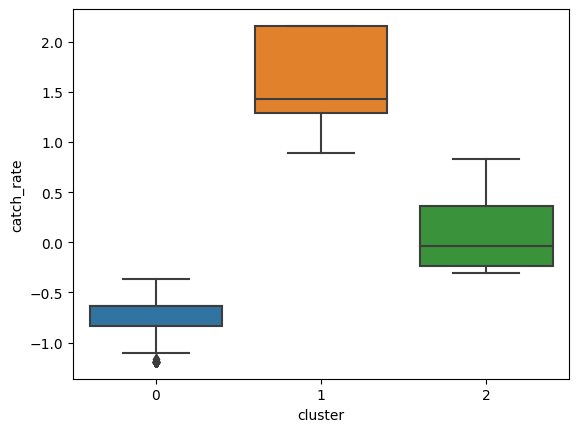

cluster          0    1    2
status                      
Legendary       37    2    3
Mythical        30    0    0
Normal         441  231  246
Sub Legendary   55    0    0


In [10]:
# Select necessary columns
pokemon_cluster = pokemon_data[['name', 'status', 'catch_rate']]

# Drop rows with missing data
pokemon_cluster = pokemon_cluster.dropna()

# Standardize 'catch_rate' column
scaler = StandardScaler()
pokemon_cluster['catch_rate'] = scaler.fit_transform(pokemon_cluster[['catch_rate']])

# Fit KMeans model to data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_cluster['cluster'] = kmeans.fit_predict(pokemon_cluster[['catch_rate']])

# Inspect clusters
print(pokemon_cluster.groupby('cluster')['catch_rate'].describe())

# Visualize clusters with boxplot
sns.boxplot(x='cluster', y='catch_rate', data=pokemon_cluster)
plt.show()

# Analyze clusters in relation to the 'status' column
print(pd.crosstab(pokemon_cluster['status'], pokemon_cluster['cluster']))


          count          mean       std      min       25%       50%  \
cluster                                                                
0        1045.0  2.719781e-17  1.000479 -1.19357 -0.634951 -0.435444   

              75%       max  
cluster                      
0        0.429085  2.158143  


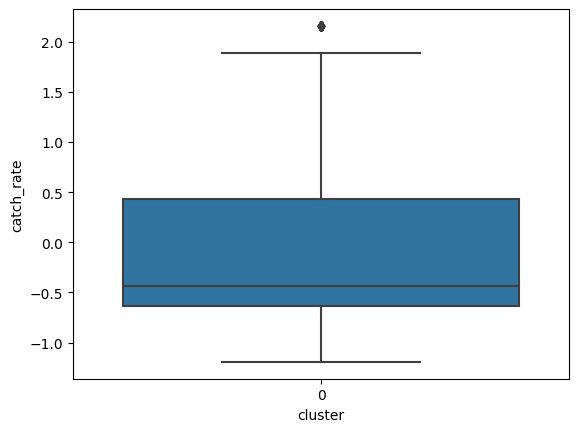

cluster          0
status            
Legendary       42
Mythical        30
Normal         918
Sub Legendary   55


In [13]:
# Use standardized 'catch_rate' data
pokemon_dbscan = pokemon_cluster[['catch_rate']]

# Fit DBSCAN model to data
dbscan = DBSCAN(eps=0.3, min_samples=10) 
pokemon_cluster['cluster'] = dbscan.fit_predict(pokemon_dbscan)

# Inspect clusters
print(pokemon_cluster.groupby('cluster')['catch_rate'].describe())

# Visualize clusters
sns.boxplot(x='cluster', y='catch_rate', data=pokemon_cluster)
plt.show()

# Analyze clusters in relation to 'status' column
print(pd.crosstab(pokemon_cluster['status'], pokemon_cluster['cluster']))


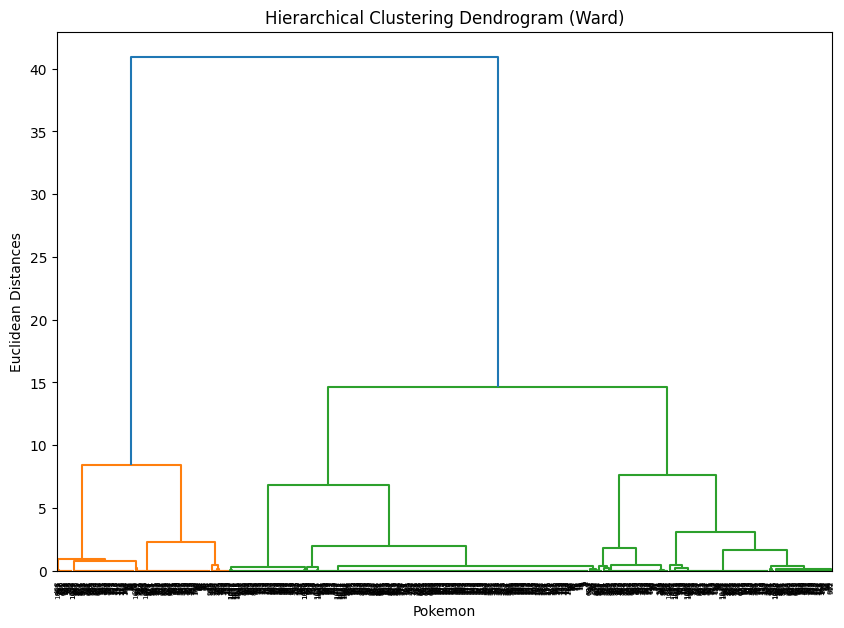

         count        mean        std    min    25%    50%    75%    max
cluster                                                                 
0        497.0   35.024145  17.040376    3.0   30.0   45.0   45.0   55.0
1        232.0  218.642241  30.716361  170.0  190.0  200.0  255.0  255.0
2        316.0   91.076908  25.899413   60.0   75.0   90.0  120.0  160.0
cluster          0    1    2
status                      
Legendary       37    2    3
Mythical        30    0    0
Normal         375  230  313
Sub Legendary   55    0    0


In [15]:
# Scale data
sc = StandardScaler()
pokemon_scaled = sc.fit_transform(pokemon_data[['catch_rate']])

# Perform hierarchical clustering
linked = linkage(pokemon_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Pokemon')
plt.ylabel('Euclidean Distances')
plt.show()

# Define 3 clusters and cut dendrogram
k = 3
clusters = cut_tree(linked, n_clusters=k).reshape(-1, )

# Add cluster labels to dataframe
pokemon_data['cluster'] = clusters

# Inspect clusters
print(pokemon_data.groupby('cluster')['catch_rate'].describe())

# Analyze clusters in relation to the 'status' column
print(pd.crosstab(pokemon_data['status'], pokemon_data['cluster']))
